# Hello, Ignite ML with Ignite Cache!

This document contains example of Ignite ML Python API for training on Ignite Cache.

In [1]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Regression

Lets prepare a regression dataset using scikit-learn.

In [2]:
x, y = make_regression(n_targets=1)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [3]:
from ignite_ml.cache import Ignition

ignite = Ignition.ignite("/home/gridgain/ignite/examples/config/example-ignite.xml")
train_cache = ignite.createCache("test-regression", parts=1)

xy_train = np.column_stack((x_train, y_train))

for i in range(xy_train.shape[0]):
    train_cache.put(i, xy_train[i])

### 1.1. Linear Regression

Now lets train a linear model using Ignite ML and estimate the quality of the model:

In [4]:
from ignite_ml.regression import LinearRegressionTrainer
trainer = LinearRegressionTrainer()
model = trainer.fit_on_cache(train_cache)

r2_score(y_test, model.predict(x_test))

0.7814609378215741

And just to compare lets do the same for scikit-learn:

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

0.7768996630598615

### 1.2. Decision Tree Regression

Using Ignite ML:

In [6]:
from ignite_ml.regression import DecisionTreeRegressionTrainer
trainer = DecisionTreeRegressionTrainer()
model = trainer.fit_on_cache(train_cache)

r2_score(y_test, model.predict(x_test))

-0.029738822735072556

And using scikit-learn:

In [7]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

-0.002510991561210263

### 1.3. KNN Regression

Using Ignite ML:

In [8]:
from ignite_ml.regression import KNNRegressionTrainer
trainer = KNNRegressionTrainer()
model = trainer.fit_on_cache(train_cache)

r2_score(y_test, model.predict(x_test))

0.30519198899152455

And using scikit-learn:

In [9]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

0.30519198899152455

### 1.4 Random Forest Regression

Using Ignite ML:

In [10]:
# TODO: Random Forest requires features metadata.

#from ignite_ml.regression import RandomForestRegressionTrainer
#trainer = RandomForestRegressionTrainer()
#model = trainer.fit_on_cache(train_cache)
#
#r2_score(y_test, model.predict(x_test))

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

/home/gridgain/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.529908791829522

### 1.5 MLP Regression

Using Ignite ML:

In [ ]:
from ignite_ml.common import MLPArchitecture
from ignite_ml.regression import MLPRegressionTrainer

trainer = MLPRegressionTrainer(MLPArchitecture(100).with_layer(1, activator='linear'))
model = trainer.fit_on_cache(train_cache)

r2_score(y_test, model.predict(x_test))

And using scikit-learn:

In [13]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(max_iter=1000)
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

/home/gridgain/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2822200039135706

## 2. Classification

Lets prepare a classification dataset using scikit-learn.

In [14]:
x, y = make_classification()
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [15]:
ignite = Ignition.ignite("/home/gridgain/ignite/examples/config/example-ignite.xml")
train_cache = ignite.createCache("test-classification")

xy_train = np.column_stack((x_train, y_train))

for i in range(xy_train.shape[0]):
    train_cache.put(i, xy_train[i])

### 2.1 Decision Tree Classification

Using Ignite ML:

In [16]:
from ignite_ml.classification import DecisionTreeClassificationTrainer
trainer = DecisionTreeClassificationTrainer()
model = trainer.fit_on_cache(train_cache)

accuracy_score(y_test, model.predict(x_test))

0.76

And using scikit-learn:

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

accuracy_score(y_test, clf.predict(x_test))

0.76

### 2.2 ANN Classification

Using Ignite ML:

In [18]:
from ignite_ml.classification import ANNClassificationTrainer
trainer = ANNClassificationTrainer()
model = trainer.fit_on_cache(train_cache)

accuracy_score(y_test, model.predict(x_test))

0.4

### 2.3 KNN Classification

Using Ignite ML:

In [19]:
from ignite_ml.classification import KNNClassificationTrainer
trainer = KNNClassificationTrainer()
model = trainer.fit_on_cache(train_cache)

accuracy_score(y_test, model.predict(x_test))

0.76

And using scikit-learn:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

accuracy_score(y_test, clf.predict(x_test))

0.76

### 2.4 LogReg Classification

Using Ignite ML:

In [21]:
from ignite_ml.classification import LogRegClassificationTrainer
trainer = LogRegClassificationTrainer()
model = trainer.fit_on_cache(train_cache)

accuracy_score(y_test, model.predict(x_test))

0.52

And using scikit-learn:

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.52

### 2.5 SVM Classification

Using Ignite ML:

In [23]:
from ignite_ml.classification import SVMClassificationTrainer
trainer = SVMClassificationTrainer()
model = trainer.fit_on_cache(train_cache)

accuracy_score(y_test, model.predict(x_test))

0.8

And using scikit-learn:

In [24]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

accuracy_score(y_test, clf.predict(x_test))

0.8

### 2.6 Random Forest Classification

Using Ignite ML:

In [25]:
# TODO: Random Forest requires features metadata.

#from ignite_ml.classification import RandomForestClassificationTrainer
#trainer = RandomForestClassificationTrainer()
# model = trainer.fit_on_cache(train_cache)
# 
# accuracy_score(y_test, model.predict(x_test))

And using scikit-learn:

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.8

### 2.7 MLP Classification

Using Ignite ML:

In [27]:
from ignite_ml.common import MLPArchitecture
from ignite_ml.classification import MLPClassificationTrainer

def encode_label(x):
    if x:
        return [0, 1]
    else:
        return [1, 0]

def decode_label(x):
    if x[0] > x[1]:
        return 0
    else:
        return 1
    
trainer = MLPRegressionTrainer(MLPArchitecture(20).with_layer(2, activator='sigmoid'))
# model = trainer.fit_on_cache(x_train, [encode_label(x) for x in y_train])

# accuracy_score(y_test, [decode_label(x) for x in model.predict(x_test)])

## 3. Clustering

Lets prepare a clustering dataset using scikit-learn.

In [28]:
x, y = make_blobs(n_samples=2000, n_features=2, cluster_std=1.0, centers=[(-3, -3), (0, 0), (3, 3)])

train_cache = ignite.createCache("test-clustering")

xy = np.column_stack((x, y))

for i in range(xy.shape[0]):
    train_cache.put(i, xy[i])

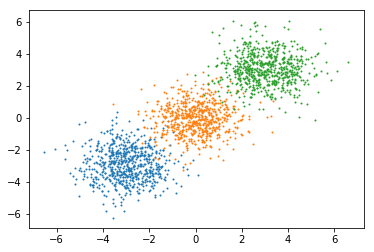

In [29]:
for i in range(3):
    plt.scatter(x[y == i][:, 0], x[y == i][:, 1], s=1)

### 3.1 KMeans Clustering

Using Ignite ML:

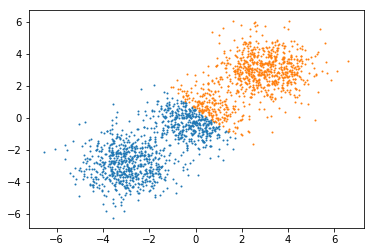

In [30]:
from ignite_ml.clustering import KMeansClusteringTrainer
trainer = KMeansClusteringTrainer(amount_of_clusters=2)
model = trainer.fit_on_cache(train_cache)

y_predicted = np.array(model.predict(x))
for i in range(3):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)

And using scikit-learn:

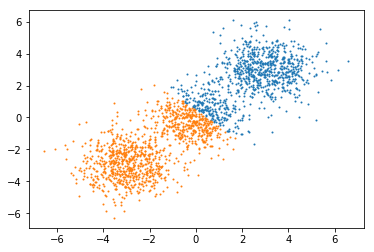

In [31]:
from sklearn.cluster import KMeans
clr = KMeans(n_clusters=2)
clr.fit(x)

y_predicted = np.array(clr.predict(x))
for i in range(2):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)

### 3.2 GMM Clustering

Using Ignite ML:

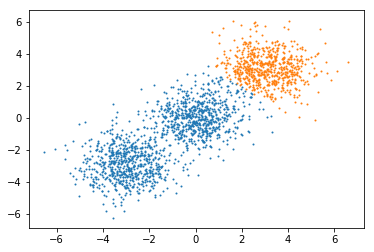

In [32]:
from ignite_ml.clustering import GMMClusteringTrainer
trainer = GMMClusteringTrainer(count_of_components=2, max_count_of_clusters=2)
model = trainer.fit_on_cache(train_cache)

y_predicted = np.array(model.predict(x))
for i in range(2):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)